In [1]:
from IPython.display import HTML

In [2]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
from scipy import stats
from pingouin import pairwise_ttests #this is for performing the pairwise tests
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

# Testing Sites


In [6]:
testing_sites_df =  pd.read_csv('testingsites.csv')

In [7]:
testing_sites_df.drop(columns = ['Owner Name','Phone','Website','Operational Hours','Vehicle Capacity','CreationDate','Drive-through','Appointment Only','Referral Required','Call first','Virtual/Telehealth Screening','Local Health Department URL','Vehicle Required','Offering same-day diagnostic (not antibody) results','Offering Take-Home Test','Status Color'], inplace = True)
testing_sites_df.drop(columns = ['Public Form Submission','Minimum Age','Wheelchair accessibility ','Accessibility Support'], inplace = True)

In [8]:

testing_sites_df['county']= testing_sites_df['County']
testing_sites_df
testing_sites_df.sort_values(by ='County')


,Name of Facility,Full Address,Municipality,Owner Type,Daily Testing Capacity,Services Offered,State or Territory,County,Testing Start Date,Testing End Date,Kind of test,Processing location,Facility Type,x,y,county
8858,CHC Enfield,"5 North Main Street, Enfield, CT",Enfield,FQHC,NaN,COVID-19 testing only (no screening),Connecticut,Hartford,11/3/2020,11/3/2020,Molecular,Not Specified,Mobile/Pop-up (short-term event),-8.082311e+06,5160794.778,Hartford
6809,ALBERTSONS 184,"6560 SOUTH FEDERAL WAY, Boise ID, 83716",Boise,Private,NaN,COVID-19 screening and testing,Idaho,Ada,8/16/2020,NaN,Molecular,Offsite Lab,Retail/Pharmacy,-1.293014e+07,5394986.099,Ada
4850,Family Medicine Health Center-Kuna,"708 E Wythe Creek Ct Ste 103, Kuna, ID 83634-5005",Kuna,FQHC,NaN,COVID-19 screening and testing,Idaho,Ada,NaN,NaN,Molecular,Offsite Lab,Clinic/Health Center,-1.295815e+07,5386506.524,Ada
6802,ALBERTSONS 169,"909 EAST PARKCENTER BLVD, Boise ID, 83706",Boise,Private,NaN,COVID-19 screening and testing,Idaho,Ada,8/16/2020,NaN,Molecular,Offsite Lab,Retail/Pharmacy,-1.293219e+07,5401123.670,Ada
3895,Rite Aid/Project Baseline Testing Site,"3250 S Eagle Road Meridian, ID",Meridian,Public-Private Partnership,NaN,COVID-19 screening and testing,Idaho,Ada,NaN,NaN,Molecular,Offsite Lab,Retail/Pharmacy,-1.295245e+07,5399916.908,Ada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10788,CIC Health Middlebury,"154 Creek Rd, Middlebury, VT 05753, USA",Middlebury,Public-Private Partnership,NaN,COVID-19 testing only (no screening),Vermont,NaN,NaN,NaN,Molecular,Offsite Lab,Indoor Non-medical Facility,-8.144216e+06,5465912.348,NaN
10789,CIC Health Brattleboro,"17 Belmont Ave, Brattleboro, VT 05301, USA",Brattleboro,Public-Private Partnership,NaN,COVID-19 testing only (no screening),Vermont,NaN,NaN,NaN,Molecular,Offsite Lab,Indoor Non-medical Facility,-8.077923e+06,5288098.494,NaN
10790,CIC Health Newton,"Riverside MBTA Station Parking Lot, 367 Grove ...",Newton,Public-Private Partnership,NaN,COVID-19 testing only (no screening),Massachusetts,NaN,NaN,NaN,Molecular,Offsite Lab,Indoor Non-medical Facility,-7.931803e+06,5211651.232,NaN
10791,CIC Health Cambridge,"Ground Floor, 245 Main St, Cambridge, MA 02142...",Cambridge,Public-Private Partnership,NaN,COVID-19 testing only (no screening),Massachusetts,NaN,NaN,NaN,Molecular,Offsite Lab,Indoor Non-medical Facility,-7.913119e+06,5215443.009,NaN


In [9]:
testing_sites_df['county_states']= testing_sites_df['county'] + ' , ' + testing_sites_df['State or Territory']
testing_sites_df

,Name of Facility,Full Address,Municipality,Owner Type,Daily Testing Capacity,Services Offered,State or Territory,County,Testing Start Date,Testing End Date,Kind of test,Processing location,Facility Type,x,y,county,county_states
0,Wheeling Hospital/WVU Hospitals Offsite COVID-...,"Wheeling Park (Near Ice Rink), 1801 National R...",Wheeling,Municipal,NaN,COVID-19 testing only (no screening),West Virginia,Ohio,NaN,NaN,Molecular,Lab (location not specified),Hospital,-8.979782e+06,4874576.993,Ohio,"Ohio , West Virginia"
1,Middleton Family Medicine,"147 South Main Street Middleton, MA 01949",Middleton,Other,NaN,COVID-19 testing only (no screening),Massachusetts,Essex,NaN,NaN,Molecular,Lab (location not specified),Clinic/Health Center,-7.904520e+06,5248669.198,Essex,"Essex , Massachusetts"
2,Central Outreach Wellness Center,"127 Anderson Street, Suite 101 Timber Court Bu...",Pittsburgh,Nonprofit,NaN,COVID-19 screening and testing,Pennsylvania,Allegheny,NaN,NaN,Molecular,Lab (location not specified),Outdoor/Tent,-8.905650e+06,4931349.163,Allegheny,"Allegheny , Pennsylvania"
3,Anthony Wayne Recreation Area,"Palisades Int Interstate Parkway, Exit 17, Bea...",Bear Mountain,State/Territory,NaN,COVID-19 testing only (no screening),New York,Orange,NaN,NaN,Molecular,Lab (location not specified),NaN,-8.240723e+06,5056547.051,Orange,"Orange , New York"
4,Wexford Health + Wellness Pavilion (Allegheny ...,"12311 Perry Highway Wexford, PA 15090",Wexford,Private,NaN,COVID-19 testing only (no screening),Pennsylvania,Allegheny,NaN,NaN,Molecular,Lab (location not specified),Clinic/Health Center,-8.912678e+06,4958745.420,Allegheny,"Allegheny , Pennsylvania"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10799,Kahoka Christian Church,"MO-81, Kahoka, MO 63445",Kahoka,State/Territory,NaN,COVID-19 testing only (no screening),Missouri,Clark,12/7/2020,12/7/2020,Molecular,Offsite Lab,Mobile/Pop-up (short-term event),-1.021017e+07,4927212.539,Clark,"Clark , Missouri"
10800,Marshall County Health Department,"513 6th Street Moundsville, WV 26041",Moundsville,Municipal,NaN,COVID-19 testing only (no screening),West Virginia,Marshall,12/14/2020,12/18/2020,Molecular,Offsite Lab,Mobile/Pop-up (short-term event),-8.988640e+06,4854205.481,Marshall,"Marshall , West Virginia"
10801,Premier Urgent Care,"1301 East 47th Street, Chicago, Il 60653",Chicago,Public-Private Partnership,30.0,COVID-19 screening and testing,Illinois,Cook,10/1/2020,3/31/2021,"Molecular, Antibody, and Antigen",More than one processing location,Urgent Care,-9.751765e+06,5132563.259,Cook,"Cook , Illinois"
10802,The Word Church,"18909 South Miles Road Warrensville Heights, O...",Cleveland,State/Territory,NaN,COVID-19 testing only (no screening),Ohio,Cuyahoga,12/13/2020,12/13/2020,Molecular,Offsite Lab,Medical Center,-9.077688e+06,5076056.620,Cuyahoga,"Cuyahoga , Ohio"


In [10]:
_ = testing_sites_df['county_states'].unique
_

<bound method Series.unique of 0             Ohio , West Virginia
1            Essex , Massachusetts
2         Allegheny , Pennsylvania
3                Orange , New York
4         Allegheny , Pennsylvania
                   ...            
10799             Clark , Missouri
10800     Marshall , West Virginia
10801              Cook , Illinois
10802              Cuyahoga , Ohio
10803    Grand Traverse , Michigan
Name: county_states, Length: 10804, dtype: object>

# Covid

In [4]:
Covid_data = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

In [10]:
Covid_data['mortality'] = Covid_data['deaths']/Covid_data['cases']
Covid_data.state.unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands'], dtype=object)

# Merge covid testing sites

In [13]:
testing_sites_covid = Covid_data.merge(testing_sites_df,
    how='inner',
    on = 'county'
)

testing_sites_covid

,date,county,state,fips,cases,deaths,mortality,Name of Facility,Full Address,Municipality,...,State or Territory,County,Testing Start Date,Testing End Date,Kind of test,Processing location,Facility Type,x,y,county_states
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0,0.0,the Everett Clinic Gunderson Building,"3927 Rucker Avenue Everett, WA 98201",Everett,...,Washington,Snohomish,NaN,NaN,Molecular,Lab (location not specified),NaN,-13604420.27,6101023.489,"Snohomish , Washington"
1,2020-01-21,Snohomish,Washington,53061.0,1,0.0,0.0,Everett Clinic Marysville,"4420 76th Street NE Marysville, WA 98270",Marysville,...,Washington,Snohomish,NaN,NaN,Molecular,Offsite Lab,Clinic/Health Center,-13600012.94,6117511.584,"Snohomish , Washington"
2,2020-01-21,Snohomish,Washington,53061.0,1,0.0,0.0,Everett Clinic Harbour Pointe (Mukilteo),"4410 106th Street SW Mukilteo, WA 98275",Harbour Pointe (Mukilteo),...,Washington,Snohomish,NaN,NaN,Molecular,Lab (location not specified),NaN,-13613643.29,6090490.634,"Snohomish , Washington"
3,2020-01-21,Snohomish,Washington,53061.0,1,0.0,0.0,Everett Clinic Smokey Point,"2901 174th Street NE Marysville, WA 98271",Smokey Point,...,Washington,Snohomish,NaN,NaN,Molecular,Offsite Lab,Clinic/Health Center,-13602246.92,6132593.962,"Snohomish , Washington"
4,2020-01-21,Snohomish,Washington,53061.0,1,0.0,0.0,Swedish Edmonds Campus,"21601 76th Ave. W. Edmonds, WA 98026",Edmonds,...,Washington,Snohomish,NaN,NaN,Molecular,Lab (location not specified),NaN,-13618179.88,6074175.770,"Snohomish , Washington"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13099030,2021-01-29,Hayes,Nebraska,31085.0,58,0.0,0.0,Hayes Center - Hayes Center High School,"501 Troth St, Hayes Center NE 69032",Hayes Center,...,Nebraska,Hayes,NaN,NaN,Molecular,Offsite Lab,Outdoor/Tent,-11245261.71,4940499.842,"Hayes , Nebraska"
13099031,2021-01-30,Hayes,Nebraska,31085.0,58,0.0,0.0,Hayes Center High School,"501 Troth St, Hayes Center NE 69032",Hayes Center,...,Nebraska,Hayes,10/12/2020,10/12/2020,Molecular,Offsite Lab,Mobile/Pop-up (short-term event),-11245261.71,4940499.842,"Hayes , Nebraska"
13099032,2021-01-30,Hayes,Nebraska,31085.0,58,0.0,0.0,Hayes Center - Hayes Center High School,"501 Troth St, Hayes Center NE 69032",Hayes Center,...,Nebraska,Hayes,NaN,NaN,Molecular,Offsite Lab,Outdoor/Tent,-11245261.71,4940499.842,"Hayes , Nebraska"
13099033,2021-01-31,Hayes,Nebraska,31085.0,58,0.0,0.0,Hayes Center High School,"501 Troth St, Hayes Center NE 69032",Hayes Center,...,Nebraska,Hayes,10/12/2020,10/12/2020,Molecular,Offsite Lab,Mobile/Pop-up (short-term event),-11245261.71,4940499.842,"Hayes , Nebraska"


In [ ]:
#  mort_county.corr()[['asthma_value_times_count', 'deaths']]

# Asthma

In [23]:
asthma = pd.read_csv('500_Cities__Current_asthma_among_adults_aged___18_years.csv')

In [24]:
asthma['state'] = asthma['StateDesc']
asthma['asthma_value_times_count'] = (asthma['Data_Value'] * asthma['PopulationCount'])/100
asthma['asthma_value_times_count']

0         528.612
1        5524.416
2         478.986
3         359.048
4         244.664
           ...   
29001     403.506
29002      45.235
29003     135.013
29004     137.800
29005     363.792
Name: asthma_value_times_count, Length: 29006, dtype: float64

In [25]:
# asthma.drop(columns = ['Category','UniqueID','Measure','Short_Question_Text','Data_Value_Footnote','CategoryID','MeasureId','CityFIPS','TractFIPS'], inplace = True)
asthma.columns

Index(['Year', 'StateAbbr', 'StateDesc', 'CityName', 'GeographicLevel',
       'DataSource', 'Category', 'UniqueID', 'Measure', 'Data_Value_Unit',
       'DataValueTypeID', 'Data_Value_Type', 'Data_Value',
       'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'PopulationCount',
       'GeoLocation', 'CategoryID', 'MeasureId', 'CityFIPS', 'TractFIPS',
       'Short_Question_Text', 'state', 'asthma_value_times_count'],
      dtype='object')

In [26]:
'''
changed aggfunc to mean because were dealing with percentage value, 
sum misrepresented the data
'''

asthma1 = asthma.groupby(['state']).mean()
asthma_state_count = asthma1['asthma_value_times_count']
asthma1

,Year,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount,CityFIPS,TractFIPS,asthma_value_times_count
state,,,,,,,,
Alabama,2017.0,11.425490,10.760224,12.210084,7.620821e+03,1.383106e+05,1.092529e+09,9.189002e+02
Alaska,2017.0,9.040351,8.621053,9.522807,1.535926e+04,2.030000e+05,2.020002e+09,1.379812e+03
Arizona,2017.0,10.344531,9.794141,10.979785,1.099551e+04,4.530350e+05,4.014536e+09,1.181525e+03
Arkansas,2017.0,9.733594,9.216406,10.329687,1.114484e+04,5.382832e+05,5.111562e+09,1.111260e+03
California,2017.0,8.897829,8.427422,9.427933,1.196123e+04,6.480528e+05,6.054179e+09,1.081963e+03
Colorado,2017.0,9.454213,8.948455,10.052247,1.023229e+04,8.280779e+05,8.040081e+09,1.001540e+03
Connecticut,2017.0,10.980085,10.433051,11.602542,1.107831e+04,9.456635e+05,9.003933e+09,1.199748e+03
Delaware,2017.0,12.065385,11.392308,12.830769,8.175115e+03,1.077580e+06,1.000300e+10,9.842651e+02
District of C,2017.0,10.266111,9.639444,11.047222,9.973309e+03,1.150000e+06,1.100101e+10,1.003154e+03


In [8]:
#putting years in 1 column before merge
#didn't use this df because we have another thats grouped by state
asthma_premerge = asthma[['StateAbbr','Year','Data_Value']]


# Census -people with insurance

In [9]:

census_insurance = pd.read_csv('https://www2.census.gov/programs-surveys/demo/datasets/income-poverty/time-series/data-extracts/2018/cps-asec-bridge-file/hhpub18.csv')
census_insurance.columns
#HCOV NOW_HCOV 
# HTML(filename='www.census.gov/data/tables/time-series/demo/health-insurance/historical-series/hib.html')

Index(['H_IDNUM', 'GEREG', 'GESTFIPS', 'GEDIV', 'HRHTYPE', 'HEFAMINC',
       'H_MONTH', 'H_YEAR', 'H_TENURE', 'H_HHNUM',
       ...
       'THCHCARE_VAL', 'THPROP_VAL', 'GTCBSA', 'GTCO', 'GTCBSAST', 'GTCBSASZ',
       'GTCSA', 'GTMETSTA', 'GTINDVPC', 'MMYY'],
      dtype='object', length=134)

# Merging covid and asthma data

In [10]:
# Covid_data & asthma
var_of_interest= ['confirmed_deaths','confirmed_cases']

In [11]:
asthma1.shape

(52, 8)

In [15]:
Covid_data.shape

(998409, 7)

In [50]:
covid_asthma = pd.merge(asthma1,Covid_data,
    how="left",                      
    left_on = ['state'],
    right_on = ['state']) 
# covid_asthma.drop('United States', axis = 0)
covasdrop= ['fips','Low_Confidence_Limit','High_Confidence_Limit','CityFIPS','TractFIPS','Year','asthma_value_times_count','PopulationCount']
covid_asthma = covid_asthma.drop(columns = covasdrop)
covid_asthma = covid_asthma.rename(columns={'Data_Value':'perc pop with asthma','mortality':'covid mortality'})

In [51]:
asthmamort = covid_asthma.groupby('county').mean()
asthmamort.to_csv('asthmamort.csv')

In [52]:
covid_asthma.corr()[['perc pop with asthma', 'deaths']]

,perc pop with asthma,deaths
perc pop with asthma,1.000000,0.013087
cases,-0.019428,0.739347
deaths,0.013087,1.000000
covid mortality,0.026290,0.012337


# AQI

In [24]:
# #not updated through 12/2020
# with open('waqi-covid19-airqualitydata-2020.csv') as AQI:
#     AQI_older = pd.read_csv(AQI)
# AQI_older.head()


In [25]:
# with open('waqi-covid19-airqualitydata-2020.csv') as AQI:
#     AQI_old = pd.read_csv(AQI)
# AQI_old.head()


In [6]:
#this takes us to a document where we need to delete the first five rows bc it's just information 
#updated currently woohoo!
AQI = pd.read_excel('AQI_US.xlsx')
AQI.head()
AQI = AQI.sort_values('Date', ascending = False)
AQIbig6list=['so2','pm10','pm25','co','no2','o3']
AQI_big6df= AQI[AQI['Specie'].isin(AQIbig6list)]


# aqigroup=['City','Specie']
# AQI_average_values = AQI_big6df.groupby(by = aqigroup).mean()
# AQI.to_csv('AQI.csv')

In [7]:
'''
Replacing NY buroughs with 'New York' for the merge with city df
'''

NYBur={
    'Manhattan':'New York', 'Brooklyn':'New York','Queens':'New York', 
    'Staten Island':'New York', 'The Bronx':'New York'
}
AQI_big6df['City'] = AQI_big6df['City'].replace(to_replace = NYBur)

<ipython-input-7-63c88c4d3d60>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AQI_big6df['City'] = AQI_big6df['City'].replace(to_replace = NYBur)


In [14]:
AQI_big6df.shape

(93237, 9)

In [15]:
Covid_data.shape

(1001656, 7)

In [21]:
AQI_average_values = pd.pivot_table(AQI_big6df, index = ['City'], values = 'median', columns = 'Specie',aggfunc = 'mean')
matching = AQI_big6df.City.isin(Covid_data.state)
matching

373        True
377       False
378       False
381       False
367        True
          ...  
212102    False
212103    False
212106    False
212108    False
212245    False
Name: City, Length: 93237, dtype: bool

In [30]:
USRegion_dict = { "Northeast" : ["Maine", "Massachusetts", "Rhode Island", "Connecticut", "New Hampshire", "Vermont", "New York", "Pennsylvania", "New Jersey", "Delaware", "Maryland", "District of C"],
"Southeast": ["West Virginia", "Virginia", "Kentucky", "Tennessee", "North Carolina", "South Carolina", "Georgia", "Alabama", "Mississippi", "Arkansas", "Louisiana", "Florida"],
"Midwest": ["Ohio", "Indiana", "Michigan", "Illinois", "Missouri", "Wisconsin", "Minnesota", "Iowa", "Kansas", "Nebraska", "South Dakota", "North Dakota"], "Southwest" : ["Texas", "Oklahoma", "New Mexico", "Arizona"],
"West": ["Colorado", "Wyoming", "Montana", "Idaho", "Washington", "Oregon", "Utah", "Nevada", "California", "Alaska", "Hawaii"]}

In [33]:


AQI_average_values['state_name'] = ['New Mexico','Georgia','Texas',
'Maryland','Idaho','Massachusetts', 'North Carolina','Illinois','South Carolina','Ohio','Texas','Colorado','Michigan','Texas',
'Indiana','California','Connecticut','Hawaii','Texas','Indiana','Mississippi','Florida',
'Nevada','Arkansas','California','Wisconsin','Tennessee','Florida','Wisconsin','Tennessee',
'New York','California','Oklahoma','Nebraska','Pennsylvania','Arizona','Oregon',
'Rhode Island','North Carolina','Virginia','California','Minnesota','Oregon','Utah',
'Texas','California','California','California','Washington','Illinois','Florida','Arizona','Maryland']
AQI_average_values

Specie,co,no2,o3,pm10,pm25,so2,state_name
City,,,,,,,
Albuquerque,1.832391,6.692545,29.788175,18.699229,24.411311,1.511667,New Mexico
Atlanta,2.841645,6.257326,19.140206,15.107969,35.149100,0.512658,Georgia
Austin,NaN,3.329897,20.808808,NaN,34.973890,0.410714,Texas
Baltimore,NaN,8.650129,21.242416,11.718579,30.686375,1.695902,Maryland
Boise,2.930848,8.005656,20.900771,19.177835,33.064433,0.740000,Idaho
Boston,2.328021,5.281491,22.412596,NaN,27.079692,1.500000,Massachusetts
Charlotte,0.890909,NaN,20.126221,11.860215,30.637532,1.500000,North Carolina
Chicago,2.591599,7.649731,23.569409,14.219512,32.673522,0.434098,Illinois
Columbia,NaN,NaN,NaN,NaN,36.890173,1.500000,South Carolina


In [34]:
AQI_average_values['City_state'] = AQI_average_values.index + ", " + AQI_average_values['state_name']

# Merging AQI with  city

Problem to overcome in the merge is that the AQI data geolocates through country and city while the covid_asthma dataset geolocates through state and county. How can we make a new column with only county or city or state for the dataset that lacks it?

We want to create a function that will sort the cities into the state

In [35]:
us_cities = pd.read_csv('uscities.csv')
us_cities = us_cities.rename(columns={'city':'City'})
us_cities

,City,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715.0,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276.0,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203,4574.0,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545,5019.0,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938,1526.0,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,Poso Park,Poso Park,CA,California,6107,Tulare,35.8114,-118.6364,2,17.0,polygon,False,False,America/Los_Angeles,3,93260,1840024878
28368,Lotsee,Lotsee,OK,Oklahoma,40143,Tulsa,36.1334,-96.2091,2,39.0,polygon,False,True,America/Chicago,3,74063,1840021674
28369,The Ranch,The Ranch,MN,Minnesota,27087,Mahnomen,47.3198,-95.6952,2,2.0,polygon,False,True,America/Chicago,3,56557,1840039629
28370,Roswell,Roswell,SD,South Dakota,46097,Miner,44.0060,-97.6975,2,1.0,polygon,False,False,America/Chicago,3,57349,1840002541


In [36]:
us_cities['city_state'] = us_cities['City'] + ", " + us_cities['state_name']

In [37]:
aqi_city = AQI_average_values.merge(us_cities,
    how="left",                      
    left_on = ['City_state'],
    right_on = ['city_state']) 
aqi_city.head()

,co,no2,o3,pm10,pm25,so2,state_name_x,City_state,City,city_ascii,...,population,density,source,military,incorporated,timezone,ranking,zips,id,city_state
0,1.832391,6.692545,29.788175,18.699229,24.411311,1.511667,New Mexico,"Albuquerque, New Mexico",Albuquerque,Albuquerque,...,761195.0,1155.0,polygon,False,True,America/Denver,2.0,87121 87120 87123 87112 87113 87110 87111 8711...,1.840019e+09,"Albuquerque, New Mexico"
1,2.841645,6.257326,19.140206,15.107969,35.149100,0.512658,Georgia,"Atlanta, Georgia",Atlanta,Atlanta,...,5449398.0,1441.0,polygon,False,True,America/New_York,1.0,30334 30331 30332 30309 30308 30305 30307 3030...,1.840014e+09,"Atlanta, Georgia"
2,NaN,3.329897,20.808808,NaN,34.973890,0.410714,Texas,"Austin, Texas",Austin,Austin,...,1687311.0,1181.0,polygon,False,True,America/Chicago,1.0,78749 78748 78741 78742 78745 78744 78747 7874...,1.840020e+09,"Austin, Texas"
3,NaN,8.650129,21.242416,11.718579,30.686375,1.695902,Maryland,"Baltimore, Maryland",Baltimore,Baltimore,...,2106068.0,2830.0,polygon,False,True,America/New_York,1.0,21218 21211 21210 21213 21212 21215 21214 2121...,1.840002e+09,"Baltimore, Maryland"
4,2.930848,8.005656,20.900771,19.177835,33.064433,0.740000,Idaho,"Boise, Idaho",Boise,Boise,...,389280.0,1056.0,polygon,False,True,America/Boise,2.0,83703 83702 83705 83704 83709 83716 83706 8371...,1.840027e+09,"Boise, Idaho"


In [38]:
'''
dropping columns and renaming for clarity before merge
'''

aqicitydrop = ['source', 'military', 'incorporated', 'timezone','lat', 'lng','county_fips','City', 'ranking', 'zips','id','state_id','city_ascii']
aqi_city = aqi_city.drop(columns= aqicitydrop)
# aqi_city = aqi_city.rename(columns={'state_name':'state','county_name':'county'})


In [39]:
us_cities

,City,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id,city_state
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715.0,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016,"New York, New York"
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276.0,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491,"Los Angeles, California"
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203,4574.0,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494,"Chicago, Illinois"
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545,5019.0,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149,"Miami, Florida"
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938,1526.0,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440,"Dallas, Texas"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,Poso Park,Poso Park,CA,California,6107,Tulare,35.8114,-118.6364,2,17.0,polygon,False,False,America/Los_Angeles,3,93260,1840024878,"Poso Park, California"
28368,Lotsee,Lotsee,OK,Oklahoma,40143,Tulsa,36.1334,-96.2091,2,39.0,polygon,False,True,America/Chicago,3,74063,1840021674,"Lotsee, Oklahoma"
28369,The Ranch,The Ranch,MN,Minnesota,27087,Mahnomen,47.3198,-95.6952,2,2.0,polygon,False,True,America/Chicago,3,56557,1840039629,"The Ranch, Minnesota"
28370,Roswell,Roswell,SD,South Dakota,46097,Miner,44.0060,-97.6975,2,1.0,polygon,False,False,America/Chicago,3,57349,1840002541,"Roswell, South Dakota"


# Merging Covid/Asthma/AQI

1. aqi cityies have incorrect counties

In [53]:
aqi_city.drop(columns = ['state_name_y','city_state'], inplace = True)

KeyError: "['state_name_y' 'city_state'] not found in axis"

In [54]:
aqi_city = aqi_city.rename(columns = {'county_name':'county'})
aqi_city.head()

,co,no2,o3,pm10,pm25,so2,state_name_x,City_state,county,population,density,county_state
0,1.832391,6.692545,29.788175,18.699229,24.411311,1.511667,New Mexico,"Albuquerque, New Mexico",Bernalillo,761195.0,1155.0,"Bernalillo, New Mexico"
1,2.841645,6.257326,19.140206,15.107969,35.149100,0.512658,Georgia,"Atlanta, Georgia",Fulton,5449398.0,1441.0,"Fulton, Georgia"
2,NaN,3.329897,20.808808,NaN,34.973890,0.410714,Texas,"Austin, Texas",Travis,1687311.0,1181.0,"Travis, Texas"
3,NaN,8.650129,21.242416,11.718579,30.686375,1.695902,Maryland,"Baltimore, Maryland",Baltimore,2106068.0,2830.0,"Baltimore, Maryland"
4,2.930848,8.005656,20.900771,19.177835,33.064433,0.740000,Idaho,"Boise, Idaho",Ada,389280.0,1056.0,"Ada, Idaho"


In [55]:
aqi_city['county_state'] = aqi_city['county'] + ", " + aqi_city['state_name_x']
aqi_city

,co,no2,o3,pm10,pm25,so2,state_name_x,City_state,county,population,density,county_state
0,1.832391,6.692545,29.788175,18.699229,24.411311,1.511667,New Mexico,"Albuquerque, New Mexico",Bernalillo,761195.0,1155.0,"Bernalillo, New Mexico"
1,2.841645,6.257326,19.140206,15.107969,35.149100,0.512658,Georgia,"Atlanta, Georgia",Fulton,5449398.0,1441.0,"Fulton, Georgia"
2,NaN,3.329897,20.808808,NaN,34.973890,0.410714,Texas,"Austin, Texas",Travis,1687311.0,1181.0,"Travis, Texas"
3,NaN,8.650129,21.242416,11.718579,30.686375,1.695902,Maryland,"Baltimore, Maryland",Baltimore,2106068.0,2830.0,"Baltimore, Maryland"
4,2.930848,8.005656,20.900771,19.177835,33.064433,0.740000,Idaho,"Boise, Idaho",Ada,389280.0,1056.0,"Ada, Idaho"
5,2.328021,5.281491,22.412596,NaN,27.079692,1.500000,Massachusetts,"Boston, Massachusetts",Suffolk,4688346.0,5532.0,"Suffolk, Massachusetts"
6,0.890909,NaN,20.126221,11.860215,30.637532,1.500000,North Carolina,"Charlotte, North Carolina",Mecklenburg,1512923.0,1113.0,"Mecklenburg, North Carolina"
7,2.591599,7.649731,23.569409,14.219512,32.673522,0.434098,Illinois,"Chicago, Illinois",Cook,8604203.0,4574.0,"Cook, Illinois"
8,NaN,NaN,NaN,NaN,36.890173,1.500000,South Carolina,"Columbia, South Carolina",Richland,560041.0,373.0,"Richland, South Carolina"
9,2.441714,7.434961,27.050442,NaN,29.125964,2.340000,Ohio,"Columbus, Ohio",Franklin,1562009.0,1582.0,"Franklin, Ohio"


In [56]:
#Dictionary of Dates 
dict_dates = {'2020-03-15','2020-04-15','2020-05-15','2020-06-15','2020-07-15','2020-08-15','2020-09-15','2020-10-15','2020-11-15','2020-12-15','2021-01-15'
}

In [57]:
covid_asthma = covid_asthma[covid_asthma['date'].isin(dict_dates)]
covid_asthma['county_state'] = covid_asthma['county'] + ", " + covid_asthma['state']
covid_asthma

,state,perc pop with asthma,date,county,cases,deaths,covid mortality,county_state
11,Alabama,11.425490,2020-03-15,Baldwin,1.0,0.0,0.000000,"Baldwin, Alabama"
12,Alabama,11.425490,2020-03-15,Elmore,1.0,0.0,0.000000,"Elmore, Alabama"
13,Alabama,11.425490,2020-03-15,Jefferson,13.0,0.0,0.000000,"Jefferson, Alabama"
14,Alabama,11.425490,2020-03-15,Lee,1.0,0.0,0.000000,"Lee, Alabama"
15,Alabama,11.425490,2020-03-15,Limestone,1.0,0.0,0.000000,"Limestone, Alabama"
...,...,...,...,...,...,...,...,...
930551,Wyoming,9.644444,2021-01-15,Sweetwater,3262.0,26.0,0.007971,"Sweetwater, Wyoming"
930552,Wyoming,9.644444,2021-01-15,Teton,2605.0,4.0,0.001536,"Teton, Wyoming"
930553,Wyoming,9.644444,2021-01-15,Uinta,1806.0,9.0,0.004983,"Uinta, Wyoming"
930554,Wyoming,9.644444,2021-01-15,Washakie,839.0,23.0,0.027414,"Washakie, Wyoming"


In [58]:
#covids_asthma = covid_asthma.dropna(inplace = True)
covid_asthma.isnull().any()

state                   False
perc pop with asthma    False
date                    False
county                  False
cases                   False
deaths                  False
covid mortality         False
county_state            False
dtype: bool

In [59]:
covid_asthma['perc pop with asthma'] = round(covid_asthma['perc pop with asthma'],4)
covid_asthma['covid mortality'] = round(covid_asthma['covid mortality'],4)

In [60]:
aqi_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   co            41 non-null     float64
 1   no2           41 non-null     float64
 2   o3            52 non-null     float64
 3   pm10          29 non-null     float64
 4   pm25          53 non-null     float64
 5   so2           44 non-null     float64
 6   state_name_x  53 non-null     object 
 7   City_state    53 non-null     object 
 8   county        50 non-null     object 
 9   population    50 non-null     float64
 10  density       50 non-null     float64
 11  county_state  50 non-null     object 
dtypes: float64(8), object(4)
memory usage: 5.4+ KB


In [61]:
master1 = pd.merge(covid_asthma,aqi_city,
    how="inner",                      
    left_on = ['county_state'],
    right_on = ['county_state']
)
master1['asthma population']= master1['perc pop with asthma'] * master1['population']
master1

,state,perc pop with asthma,date,county_x,cases,deaths,covid mortality,county_state,co,no2,o3,pm10,pm25,so2,state_name_x,City_state,county_y,population,density,asthma population
0,Arizona,10.3445,2020-03-15,Maricopa,4.0,0.0,0.0000,"Maricopa, Arizona",4.621594,9.324679,19.580463,22.863753,32.012853,0.179946,Arizona,"Phoenix, Arizona",Maricopa,4219697.0,1253.0,4.365066e+07
1,Arizona,10.3445,2020-04-15,Maricopa,2146.0,60.0,0.0280,"Maricopa, Arizona",4.621594,9.324679,19.580463,22.863753,32.012853,0.179946,Arizona,"Phoenix, Arizona",Maricopa,4219697.0,1253.0,4.365066e+07
2,Arizona,10.3445,2020-05-15,Maricopa,6821.0,302.0,0.0443,"Maricopa, Arizona",4.621594,9.324679,19.580463,22.863753,32.012853,0.179946,Arizona,"Phoenix, Arizona",Maricopa,4219697.0,1253.0,4.365066e+07
3,Arizona,10.3445,2020-06-15,Maricopa,19372.0,557.0,0.0288,"Maricopa, Arizona",4.621594,9.324679,19.580463,22.863753,32.012853,0.179946,Arizona,"Phoenix, Arizona",Maricopa,4219697.0,1253.0,4.365066e+07
4,Arizona,10.3445,2020-07-15,Maricopa,86483.0,1277.0,0.0148,"Maricopa, Arizona",4.621594,9.324679,19.580463,22.863753,32.012853,0.179946,Arizona,"Phoenix, Arizona",Maricopa,4219697.0,1253.0,4.365066e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,Wisconsin,10.6942,2020-09-15,Milwaukee,27289.0,517.0,0.0189,"Milwaukee, Wisconsin",2.608740,7.849357,23.490488,13.881748,32.876607,0.418684,Wisconsin,"Milwaukee, Wisconsin",Milwaukee,1365787.0,2369.0,1.460600e+07
499,Wisconsin,10.6942,2020-10-15,Milwaukee,36134.0,554.0,0.0153,"Milwaukee, Wisconsin",2.608740,7.849357,23.490488,13.881748,32.876607,0.418684,Wisconsin,"Milwaukee, Wisconsin",Milwaukee,1365787.0,2369.0,1.460600e+07
500,Wisconsin,10.6942,2020-11-15,Milwaukee,59549.0,652.0,0.0109,"Milwaukee, Wisconsin",2.608740,7.849357,23.490488,13.881748,32.876607,0.418684,Wisconsin,"Milwaukee, Wisconsin",Milwaukee,1365787.0,2369.0,1.460600e+07
501,Wisconsin,10.6942,2020-12-15,Milwaukee,84196.0,833.0,0.0099,"Milwaukee, Wisconsin",2.608740,7.849357,23.490488,13.881748,32.876607,0.418684,Wisconsin,"Milwaukee, Wisconsin",Milwaukee,1365787.0,2369.0,1.460600e+07


In [62]:
"""
we assumed the population from our city dataset represents the population examined 
when determining the percentage of population with asthma.

expected pm25 correlation
high correlation between no2 and cases/deaths
low correlation with density while population is high - could be how the density is calculated 
asthma and deaths have high correlation

variables to include in our model:
asthma_pop
population
pm25
no2
see how that predicts cases and deaths

use model in anova
"""
master1.corr()

,perc pop with asthma,cases,deaths,covid mortality,co,no2,o3,pm10,pm25,so2,population,density,asthma population
perc pop with asthma,1.000000,-0.140697,0.007183,0.192207,-0.151473,-0.037839,0.237405,-0.371402,-0.265221,0.120443,-0.136717,0.059667,-0.029740
cases,-0.140697,1.000000,0.902363,-0.060596,-0.026240,0.376239,-0.022575,0.132909,0.217007,-0.094346,0.540164,0.169715,0.515952
deaths,0.007183,0.902363,1.000000,0.045575,-0.027201,0.406109,0.000010,0.058704,0.209288,-0.058655,0.657945,0.292333,0.659465
covid mortality,0.192207,-0.060596,0.045575,1.000000,-0.030830,0.016518,-0.130152,-0.184412,-0.070426,0.006911,0.043087,0.076799,0.068812
co,-0.151473,-0.026240,-0.027201,-0.030830,1.000000,0.433973,0.006089,-0.265008,-0.109794,0.809607,-0.046781,0.038239,-0.052292
no2,-0.037839,0.376239,0.406109,0.016518,0.433973,1.000000,0.115641,0.233967,0.439448,0.407056,0.495784,0.186864,0.481277
o3,0.237405,-0.022575,0.000010,-0.130152,0.006089,0.115641,1.000000,-0.118732,-0.039450,0.161711,-0.084081,-0.075242,-0.056466
pm10,-0.371402,0.132909,0.058704,-0.184412,-0.265008,0.233967,-0.118732,1.000000,0.635479,-0.220220,0.095722,-0.154298,0.063993
pm25,-0.265221,0.217007,0.209288,-0.070426,-0.109794,0.439448,-0.039450,0.635479,1.000000,-0.114727,0.291599,-0.053794,0.257383
so2,0.120443,-0.094346,-0.058655,0.006911,0.809607,0.407056,0.161711,-0.220220,-0.114727,1.000000,-0.085112,0.169104,-0.065140


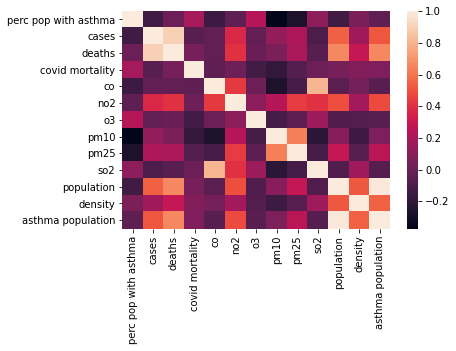

In [63]:
corr = master1.corr()
sns.heatmap(corr);

In [64]:
master1.describe()

,perc pop with asthma,cases,deaths,covid mortality,co,no2,o3,pm10,pm25,so2,population,density,asthma population
count,503.000000,503.000000,503.000000,503.000000,393.000000,394.000000,503.000000,286.000000,503.000000,415.000000,5.030000e+02,503.000000,5.030000e+02
mean,9.842716,37359.333996,763.234592,0.026355,3.438370,7.383215,19.312461,19.156188,33.083659,1.184146,2.409346e+06,1985.361829,2.335946e+07
std,1.044823,75722.905399,1377.411984,0.048358,3.155979,2.976305,5.292940,6.487627,6.554269,0.988478,2.490451e+06,1467.218271,2.316402e+07
min,8.508400,1.000000,0.000000,0.000000,0.100000,2.043814,3.273779,10.270619,18.817010,0.157772,1.585090e+05,417.000000,1.495818e+06
25%,8.897800,2392.000000,56.500000,0.011600,2.328021,6.232558,17.123136,14.347962,29.125964,0.434098,8.433860e+05,1022.000000,7.345334e+06
50%,9.733600,14353.000000,285.000000,0.017700,2.751157,7.294602,20.808808,17.985865,32.876607,1.500000,1.562009e+06,1526.000000,1.460600e+07
75%,10.694200,36838.500000,799.500000,0.032300,4.062207,9.291037,22.374104,22.601542,35.269923,1.563636,3.506126e+06,2369.000000,3.196351e+07
max,12.239200,990326.000000,13489.000000,1.000000,20.435754,19.061954,29.788175,37.219638,56.134367,5.709740,1.275081e+07,7256.000000,1.134541e+08


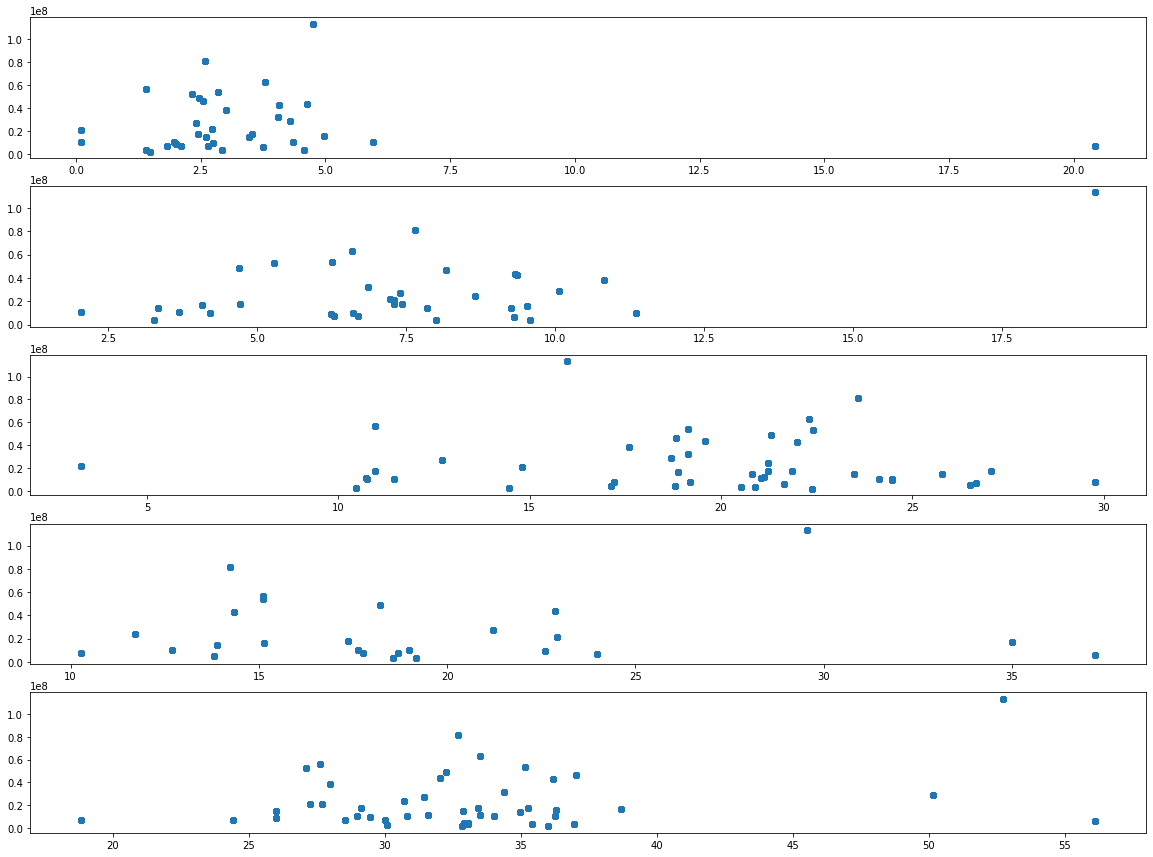

In [65]:
#scatterplot of asthma with aqi pollutants
fig, (ax2, ax3, ax4, ax5, ax6) = plt.subplots(5,figsize= (20,15))
ax2.scatter(master1['co'], master1['asthma population'])
ax3.scatter(master1['no2'], master1['asthma population'])
ax4.scatter(master1['o3'], master1['asthma population'])
ax5.scatter(master1['pm10'], master1['asthma population'])
ax6.scatter(master1['pm25'], master1['asthma population']);

In [42]:
master1.corr()

,perc pop with asthma,cases,deaths,covid mortality,co,no2,o3,pm10,pm25,so2,population,density,asthma population
perc pop with asthma,1.000000,-0.140697,0.007183,0.192207,-0.151473,-0.037839,0.237405,-0.371402,-0.265221,0.120443,-0.136717,0.059667,-0.029740
cases,-0.140697,1.000000,0.902363,-0.060596,-0.026240,0.376239,-0.022575,0.132909,0.217007,-0.094346,0.540164,0.169715,0.515952
deaths,0.007183,0.902363,1.000000,0.045575,-0.027201,0.406109,0.000010,0.058704,0.209288,-0.058655,0.657945,0.292333,0.659465
covid mortality,0.192207,-0.060596,0.045575,1.000000,-0.030830,0.016518,-0.130152,-0.184412,-0.070426,0.006911,0.043087,0.076799,0.068812
co,-0.151473,-0.026240,-0.027201,-0.030830,1.000000,0.433973,0.006089,-0.265008,-0.109794,0.809607,-0.046781,0.038239,-0.052292
no2,-0.037839,0.376239,0.406109,0.016518,0.433973,1.000000,0.115641,0.233967,0.439448,0.407056,0.495784,0.186864,0.481277
o3,0.237405,-0.022575,0.000010,-0.130152,0.006089,0.115641,1.000000,-0.118732,-0.039450,0.161711,-0.084081,-0.075242,-0.056466
pm10,-0.371402,0.132909,0.058704,-0.184412,-0.265008,0.233967,-0.118732,1.000000,0.635479,-0.220220,0.095722,-0.154298,0.063993
pm25,-0.265221,0.217007,0.209288,-0.070426,-0.109794,0.439448,-0.039450,0.635479,1.000000,-0.114727,0.291599,-0.053794,0.257383
so2,0.120443,-0.094346,-0.058655,0.006911,0.809607,0.407056,0.161711,-0.220220,-0.114727,1.000000,-0.085112,0.169104,-0.065140


In [110]:
# Ttest with no2, pm25
stats.ttest_1samp(master1['o3'], master1['asthma population'])

Ttest_1sampResult(statistic=0     -1.849599e+08
1     -1.849599e+08
2     -1.849599e+08
3     -1.849599e+08
4     -1.849599e+08
           ...     
498   -6.188961e+07
499   -6.188961e+07
500   -6.188961e+07
501   -6.188961e+07
502   -6.188961e+07
Name: asthma population, Length: 503, dtype: float64, pvalue=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0

In [43]:
co = master1['co']
no2 = master1['no2']
o3 = master1['o3']
pm10=master1['pm10']
pm25=master1['pm25']
so2=master1['so2']
asthma_population = master1['asthma population']

In [44]:

!pip install bioinfokit
from bioinfokit.analys import stat


     |████████████████████████████████| 80 kB 4.9 MB/s eta 0:00:011
  Created wheel for bioinfokit: filename=bioinfokit-1.0.7-py3-none-any.whl size=55616 sha256=2bf8cd51eb9e6d6d94cf6452ab1a162c970b09a7ebb5b69d1930e7d595927a9b
  Stored in directory: /Users/ronniesimmons/Library/Caches/pip/wheels/9d/1f/84/05c533566c4ce52836bde2ba35041b4f27e6f1093398f17866
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.6-py3-none-any.whl size=32061 sha256=832b12f37c2cc056f5283faf4835dceaea56ade7fe84b7eabcbbf0265c68cf22
  Stored in directory: /Users/ronniesimmons/Library/Caches/pip/wheels/82/e4/64/dd790d424818bc2f59c11471a1eee5dc8cfcd3f8ee8c4812fa
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=4677e81ed1915f241a1a5e3052eebd420a67cd2df9b32aa511835bd23cc3a34b
  Stored in directory: /Users/ronniesimmons/Library/Caches/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
Successfully built bioinfokit matplotlib-venn adjustText


In [45]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
model = old()

Ideas on kernel death:
1. if joining by state, different cities will be joined together? --> refine to match by city or county instead of state probably by county

2.  5.62 GiB for array with shape 753807573


# Analysis

In [46]:
"""
For analysis, we should find the top ten or twenty areas of worst air quality in the U.S. 
and see if there is a correlation between the coronavirus mortality

another comparing the aqi to asthma rates to see correlation

then asthma to coronavirus mortality

Then we could see top ten or twenty areas with the most significant coronavirus mortality and cross it with the aqi stacked by pollutant like in the Chicago case study, then do chi square on the variables
"""

#chose top and bottom cities based on the first occurence starting from top of the list and bottom of the list
#ozone is worse in hot weather, we noticed a trend in summer months

# x = AQI_big6df[AQI_big6df['Specie'] == 'o3'].sort_values(by = 'median', ascending = False)
# x = x.groupby('City').min()['median'].sort_values()
# x
top_5_cities_o3 = ['Chicago, Illinois', 'Milwaukee, Wisconsin', 'Madison, ', 'San Diego', 'Albuquerque','Tucson','Indianapolis','Columbus','Las Vegas','Dallas']
bottom_5_cities_o3 = ['Sacramento', 'Portland','Salem','New York','Los Angeles','Little Rock','Seattle','Nashville','Milwaukee','Denver']

# Multiple Linear Regression Model: 
1:10 Ratio --> We plan to clean and remerge the master by taking the mean of each month for each city to give us more rows

If it doesn't work
**Asthma relationship to air pollution**
1st Try

Independent Variables: PM10, PM25, NO2,
Dependent Variable: asthma


2nd Try

Independent Variables: SO2, CO, O3
Dependent Variable: asthma 

# Linear Regression
**Asthma to Covid Mort**
Independent Variable: Perc. Pop of Asthma 
Dependent Variables: Covid Mortality

**Asthma Population to Covid Deaths**
Independent Variable: Asthma Population
Dependent Variable: Covid Deaths



In [108]:
master2 = master1.copy()
drops = master2[master2['no2'].isnull() == True]
master2.drop(index = drops.index, inplace = True)

In [109]:
master2.isnull().sum()

state                     0
perc pop with asthma      0
date                      0
county_x                  0
cases                     0
deaths                    0
covid mortality           0
county_state              0
co                       44
no2                       0
o3                        0
pm10                    152
pm25                      0
so2                      33
state_name_x              0
City_state                0
county_y                  0
population                0
density                   0
asthma population         0
dtype: int64

In [141]:
#presplit our dataset
X2 = np.array(master2['no2']).reshape(-1,1)
y2 = master2['asthma population']

In [142]:
y2.isnull().any()

False

In [143]:
#splitting dataset into 30% test and 70% train
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [144]:
#training our model
regressor = LinearRegression()
regressor.fit(X2_train, y2_train) 

LinearRegression()

In [145]:
#prediction of the test dataset
y_prediction = regressor.predict(X2_test)
y_prediction

array([14628952.95062055, 23669449.19961751, 36786562.14672241,
       27651366.01873976, 29590564.72078521, 41681393.15698342,
       26318579.12456029, 29590564.72078521, 31435951.24829328,
       11309078.66433608, 70824739.8753238 , 28406568.09256764,
       33755919.06309493, 28406568.09256764, 41681393.15698342,
       24030252.1372657 , 28997857.0038618 , 36786562.14672241,
       22383784.82341548, 27651366.01873976, 22525771.96329863,
       28997857.0038618 , 14144238.57832406, 39665370.2735743 ,
       16484517.57672783, 33895440.81517301, 41681393.15698342,
       16484517.57672783, 22383784.82341548, 14144238.57832406,
       33755919.06309493, 26678409.54755174, 23698624.63931951,
       36786562.14672241, 16554478.68247902, 16484517.57672783,
       70824739.8753238 , 28406568.09256764, 24030252.1372657 ,
       33987829.70756271, 33987829.70756271, 16554478.68247902,
       24689617.07453122,  6443723.18667509, 28997857.0038618 ,
       12659610.77073469, 26678409.54755

In [148]:
import statsmodels.formula.api as sm

regressor_OLS = sm.OLS(endog = master2['asthma population'], exog = master2['no2']).fit()
regressor_OLS.summary()

AttributeError: module 'statsmodels.formula.api' has no attribute 'OLS'

In [102]:
#Check for the r^2 value
regressor.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [133]:
X3 = np.array(master1['pm25']).reshape(-1,1)
y3 = master1['asthma population']

In [134]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [135]:
regressor3 = LinearRegression()
regressor3.fit(X3_train, y3_train) 

LinearRegression()

In [136]:
y_prediction3 = regressor3.predict(X3_test)
y_prediction3

array([14657626.75588757, 23658154.22324566, 36413037.35943174,
       27695338.89180449, 29527407.1193225 , 41892667.36881427,
       26492651.09085004, 29527407.1193225 , 31566742.82909223,
       11155037.67649332, 70655802.27492978, 28450977.90476257,
       34037829.69066113, 28450977.90476257, 41892667.36881427,
       24277400.86105954, 29041797.23281378, 36413037.35943174,
       22315093.07857333, 27695338.89180449, 22644742.13570068,
       29041797.23281378, 13908844.24553376, 39939560.60275097,
       16449644.24922451, 33329568.03532907, 41892667.36881427,
       16449644.24922451, 22315093.07857333, 13908844.24553376,
       34037829.69066113, 26748913.40042798, 23609736.67323742,
       36413037.35943174, 16486825.98192674, 16449644.24922451,
       70655802.27492978, 28450977.90476257, 24277400.86105954,
       34102066.05347076, 34102066.05347076, 16486825.98192674,
       24661081.29337038,  6418932.67821002, 29041797.23281378,
       12544008.21850247, 26748913.40042

In [77]:
#linear regression of covid asthma pop perc. and covid mort
#presplit our dataset
X = np.array(covid_asthma['perc pop with asthma']).reshape(-1,1)

y = covid_asthma['covid mortality']

In [79]:
#splitting dataset into 30% test and 70% train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [82]:
#training our model
regressor2 = LinearRegression()
regressor2.fit(X,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# HistAQI


In [42]:
histAQI = pd.read_excel('airqualitytrendsbycity1990-2019.xlsx')
histAQI.head()

FileNotFoundError: [Errno 2] No such file or directory: 'airqualitytrendsbycity1990-2019.xlsx'

In [ ]:
histAQI_Year_column = pd.melt(histAQI, id_vars=(['Pollutant','StateAbbr','Trend Statistic']), value_vars=([1990,
                                1991,                          1992,
                                1993,                          1994,
                                1995,                          1996,
                                1997,                          1998,
                                1999,                          2000,
                                2001,                          2002,
                                2003,                          2004,
                                2005,                          2006,
                                2007,                          2008,
                                2009,                          2010,
                                2011,                          2012,
                                2013,                          2014,
                                2015,                          2016,
                                2017,                          2018,
                                2019]), var_name='Year', value_name='Pollutant Value').dropna()
histAQI_Year_column.head()

In [ ]:
cities = histAQI['Core Based Statistical Area']
y = [str(i).split() for i in cities]

states = []
for i in y:
    state = i[-1]
    states.append(state)
histAQI['StateAbbr'] = states

In [ ]:
histAQI.head()

In [ ]:
histAQI_asthma= histAQI_asthma[histAQI_asthma.StateAbbr != 'US']

In [ ]:
histAQI_asthma

In [ ]:
#copied code to fill in values from histAQI_asthma
sns.lineplot(x = "Year", y = "Pollutant Value", data = histAQI_Year_column)
plt.title('Total Pollutant Values over Time')
plt.show()

In [ ]:
sns.lineplot(x = "Year", y = "Pollutant Value", data = histAQI_Year_column)
plt.title('Total Pollutant Values over Time')
plt.show()

In [ ]:
sns.lineplot(x = "Year", y = "Pollutant Value", data = histAQI_Year_column, hue = "Pollutant")
plt.title('Pollutant Values over Time')
plt.show()

# Merge AQI and Asthma

In [ ]:
#append adds rows
# histAQI_asthma = histAQI_Year_column.append(asthma_premerge)

#merge combines
AQI_asthma = pd.merge(asthma1,AQI_big6df,
    how="left",                      
    left_on = ['state'],
    right_on = ['state'])                        
AQI_asthma


# Demographics


In [ ]:
demographics_data = pd.read_csv("https://data.cdc.gov/resource/vbim-akqf.csv")

In [ ]:
demographics_data.groupby('race_ethnicity_combined').size()


In [ ]:
demographics_data.describe()